### 验证RBS图模型正确性

layer assigned


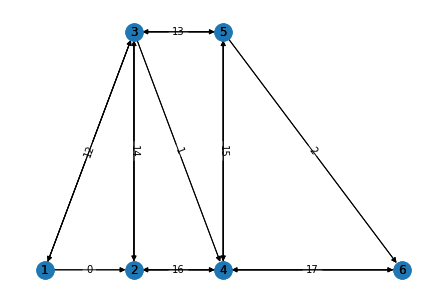

[1, 6]


In [5]:
from rbs import RBS
from mdgraph import MdGraph
import networkx as nx 
import matplotlib.pyplot as plt

num_bats = 3
Rbs = RBS()
gene,terminal = Rbs.gene_f(num_bats)
num_sws = int(len(gene)/2)-num_bats
MDGra = MdGraph(num_bats,num_sws)
G = MDGra.build(gene)
G,terminal = MDGra.assign_layer(G,terminal)
print('layer assigned')
# pos = nx.multipartite_layout(G,subset_key='layer')
pos = MDGra.build_pos(G,terminal)
# pos = nx.circular_layout(G)
nx.draw(G,pos)
edge_labels = nx.get_edge_attributes(G,'edge_label')
node_labels = nx.get_node_attributes(G,'name')

edge_labels_m = {}
for nodes_name in edge_labels.keys():
    edge_labels_m[(nodes_name[0],nodes_name[1])]=edge_labels[nodes_name]

nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels_m)
nx.draw(G,pos,with_labels=True)
plt.show()
print(terminal)

In [19]:
paths_by_edge = []
edges_in_circuit = []
for path in nx.all_simple_edge_paths(G,*terminal):
    _path_by_edge = [edge_label for source, target, edge_label in path]
    paths_by_edge = paths_by_edge + [_path_by_edge]
    edges_in_circuit = edges_in_circuit + _path_by_edge 
edges_in_circuit = set(edges_in_circuit)

paths_in_graph = [(source,target,attr) for edge in edges_in_circuit for source,target,attr in G.edges(data=True) if attr['edge_label']==edge]
circuit_G = nx.MultiDiGraph()
circuit_G.add_edges_from(paths_in_graph)
for x in circuit_G.edges(data=True):
    print(x)

(1, 2, {'edge_name': 0, 'edge_label': 0, 'capacity': 1})
(2, 3, {'edge_name': 4, 'edge_label': 4, 'capacity': 3})
(2, 4, {'edge_name': 7, 'edge_label': 7, 'capacity': 3})
(3, 4, {'edge_name': 1, 'edge_label': 1, 'capacity': 1})
(4, 5, {'edge_name': 5, 'edge_label': 5, 'capacity': 3})
(4, 6, {'edge_name': 8, 'edge_label': 8, 'capacity': 3})
(5, 6, {'edge_name': 2, 'edge_label': 2, 'capacity': 1})
(0, 1, {'edge_name': 3, 'edge_label': 3, 'capacity': 3})
(0, 2, {'edge_name': 6, 'edge_label': 6, 'capacity': 3})


## 指标计算正确性验证

In [2]:
from rbs import RBS
from mdgraph import MdGraph
import copy
import json

num_bats= 3
Rbs = RBS()
gene,terminal = Rbs.gene_a(num_bats)
print('terminal',terminal)
num_sws = int(len(gene)/2)-num_bats

GRA = MdGraph(num_bats,num_sws)
G = GRA.build(gene)
G,terminal = GRA.select_circuit(G)
res = GRA.eva_main(G,terminal)
print(res)

terminal [0, 6]
paths_by_edge [3, 0, 4, 1, 5, 2]
paths_by_edge [3, 0, 4, 1, 8]
paths_by_edge [3, 0, 7, 5, 2]
paths_by_edge [3, 0, 7, 8]
paths_by_edge [6, 4, 1, 5, 2]
paths_by_edge [6, 4, 1, 8]
paths_by_edge [6, 7, 5, 2]
[[[3, 0, 4, 1, 5, 2]], [[3, 0, 4, 1, 8]], [[3, 0, 7, 5, 2]], [[3, 0, 7, 8]], [[6, 4, 1, 5, 2]], [[6, 4, 1, 8]], [[6, 7, 5, 2]]]
{'f_vol': 1.0, 'f_connect': 1.0, 'f_discon': 1.0, 'f_cur': 0.3333333333333332, 'f_cost': 0.42857142857142855}
